In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [77]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5)

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
def softmax(A):
    A = np.exp(A)
    d = np.linalg.norm(A,ord=1,axis=1)
    A = np.diag(1/d)@A
    return A

In [56]:
def cost_softmax(Y,X,theta):
    m,n = X.shape
    _,k = Y.shape
    P = softmax(X@theta)
    
    cost = 0
    for i in range(m):
        for j in range(k):
            cost = cost + Y[i,j] * np.log(P[i,j])
    return (-1/m)*cost

In [54]:
def softmax_regression_GD(X,Y,s,n_iterations):
    m,n = X.shape
    _,k = Y.shape
    
    theta = np.random.randn(n,k)
    E = np.zeros(n_iterations)
    for i in range(n_iterations):
        gradient = (1/m)*X.T@(softmax(X@theta)-Y)
        theta = theta - s*gradient
        E[i] = cost_softmax(Y,X,theta)
    return theta,E
        

In [82]:
softmax(A)
np.sum(softmax(A),axis=1)


k=3
m = 150
Y = np.zeros((m,3)) 
Y[iris_data['species']=='Iris-setosa',0]=1
Y[iris_data['species']=='Iris-versicolor',1]=1
Y[iris_data['species']=='Iris-virginica',2]=1

X = iris_data.iloc[:,:4].to_numpy()

In [83]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

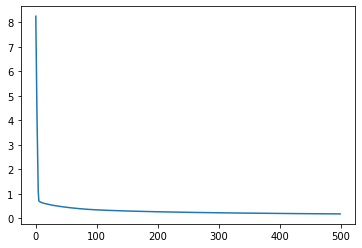

In [84]:
s = 0.1
n_iterations = 500
theta,E = softmax_regression_GD(X,Y,s,n_iterations)
plt.plot(E)

In [86]:
P = softmax(X@theta)
np.round(P,3)

array([[0.983, 0.017, 0.   ],
       [0.943, 0.057, 0.   ],
       [0.974, 0.026, 0.   ],
       [0.954, 0.046, 0.   ],
       [0.987, 0.013, 0.   ],
       [0.987, 0.013, 0.   ],
       [0.982, 0.018, 0.   ],
       [0.974, 0.026, 0.   ],
       [0.942, 0.058, 0.   ],
       [0.947, 0.053, 0.   ],
       [0.986, 0.014, 0.   ],
       [0.972, 0.028, 0.   ],
       [0.946, 0.054, 0.   ],
       [0.976, 0.024, 0.   ],
       [0.995, 0.005, 0.   ],
       [0.997, 0.003, 0.   ],
       [0.994, 0.006, 0.   ],
       [0.982, 0.018, 0.   ],
       [0.981, 0.019, 0.   ],
       [0.99 , 0.01 , 0.   ],
       [0.954, 0.046, 0.   ],
       [0.987, 0.013, 0.   ],
       [0.995, 0.005, 0.   ],
       [0.948, 0.052, 0.   ],
       [0.951, 0.049, 0.   ],
       [0.915, 0.085, 0.   ],
       [0.968, 0.032, 0.   ],
       [0.978, 0.022, 0.   ],
       [0.976, 0.024, 0.   ],
       [0.955, 0.045, 0.   ],
       [0.939, 0.061, 0.   ],
       [0.968, 0.032, 0.   ],
       [0.995, 0.005, 0.   ],
       [0.

In [87]:
y_predicted = np.argmax(P,axis=1)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
y = np.zeros(150)
y[iris_data['species']=='Iris-versicolor']=1
y[iris_data['species']=='Iris-virginica']=2
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [91]:
C = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        C[i,j] = np.sum(y_predicted[y==i]==j)
C

array([[50.,  0.,  0.],
       [ 0., 46.,  4.],
       [ 0.,  2., 48.]])

In [94]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/log-regress/master/fashion.csv'
data = pd.read_csv(url)
data.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
labels = data['label']
pixels = data.iloc[:,1:]

In [96]:
row = 50
item = pixels.iloc[row,:].to_numpy()
item.shape

(784,)

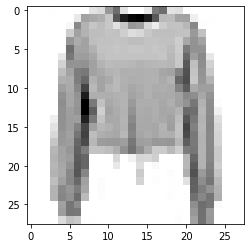

In [97]:
item = item.reshape(28,28)
plt.imshow(item,cmap='binary')

In [98]:
'''10 labels:
0: T-shirt
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Angle boot
'''

labels[row]

2

In [99]:
len(pixels)

10000

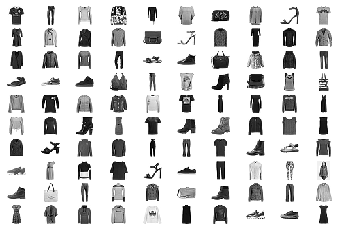

In [100]:
X = pixels.to_numpy()
for i in range(100):
    item = X[i,:]
    image = item.reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.imshow(image,cmap='binary')
    plt.axis('off')
    

In [101]:
label_list = list(range(10)) #[0,1,...,9]
Y = np.zeros((10000,10))
for i in range(10):
    Y[labels==i,i]=1

In [102]:
pixels_scaled = (pixels-pixels.mean())/pixels.std()
X = pixels_scaled.to_numpy()

/home/kogtrey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/home/kogtrey/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


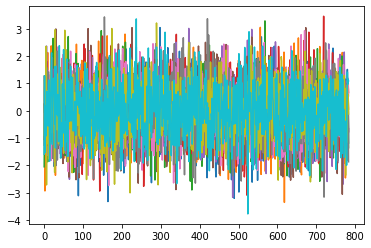

In [103]:
s = 1
n_iterations = 10
E,tehta = softmax_regression_GD(X,Y,s,n_iterations)
plt.plot(E)